In [1]:
#Adds higher directory to path to access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *
from ATS.stats import *

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

pd.options.display.max_columns = None

2021-11-08 21:32:07.818974: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-08 21:32:07.819007: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
service_id = '1165437d82ea41dea70b8103de3b38ac'

# Load and Subset Data

<Item title:"SAC_Residual_Dry_Matter_Monitoring_RT" type:Feature Layer Collection owner:Anooshi>
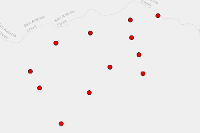

In [3]:
output = arcGIS_data_load(service_id)

stations = output['data0']
observations = output['table0']
feature_service = output['feature_service']

In [4]:
data = stations.merge(observations, left_on='GlobalID', right_on='Ref_to_Stations', how='inner')
data = data.drop(columns=['GlobalID_x','Ref_to_Stations'])
data = data.rename(columns={'OBJECTID_12':'Point_ObjectID','GlobalID_y':'Recond_GlobalID','OBJECTID':'Record_ObjectID'})
data

,Point_ObjectID,Plot_Numbe,Habitat_Ty,Zone,Slope,BHR_Site,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,Dom_Speci_1,Dom_Speci_2,Dom_Speci_3,Comments,Recond_GlobalID,RDM_gramssq,RDM_lbsac,Clipped_Weight,Tare_Weight,Observation_Date,Herbaceous_Height,Grazing_Pressure
0,1,SA1.4,Sycamore riparian - rehabilitate,6,3-12%,SAC,"{'x': 6189444.151391968, 'y': 2037829.54900164...",1,Roger Stephens,Jackson Sabol,Elymus triticoides,Elymus glaucus,Avena sp.,"Hoop in South. In planted area, herbaceous lay...",c3d12d19-32e0-482f-8a6c-e4790721836c,39.0,3744,46.0,7.0,2018-09-13 23:49:58,3.00,Low
1,1,SA1.4,Sycamore riparian - rehabilitate,6,3-12%,SAC,"{'x': 6189444.151391968, 'y': 2037829.54900164...",24,Roger Stephens,Nicholas Regent,Elymus triticoides,Elymus glaucus,Bromus diandrus,"Hoop in west, in dense ELYTRI. In planted area...",4043d30a-b05c-4418-8ead-61b6897526b3,95.0,9120,116.0,21.0,2019-09-28 00:43:21,2.50,Low
2,1,SA1.4,Sycamore riparian - rehabilitate,6,3-12%,SAC,"{'x': 6189444.151391968, 'y': 2037829.54900164...",38,Roger Stephens,Kurt Lutz,Elymus triticoides,Avena sp.,Elymus glaucus,Hoop landed in SW quad in mostly ELYTRI. Avena...,b02a91ae-1496-4dbc-8446-8bb521148b50,43.0,4128,50.0,7.0,2020-09-22 17:05:10,2.50,Low
3,1,SA1.4,Sycamore riparian - rehabilitate,6,3-12%,SAC,"{'x': 6189444.151391968, 'y': 2037829.54900164...",52,Kurt Lutz,Roger Stephens,Elymus triticoides,Avena sp.,Bromus diandrus,Little to no grazing pressure here. Plot is be...,65c324b9-3cb6-4f48-91fe-68e47d29c6de,25.0,2400,32.0,7.0,2021-09-23 19:32:59,2.50,Low
4,2,SAC2.5,Non-native grassland -enhancement,5S,3-12%,SAC,"{'x': 6188398.97172381, 'y': 2037674.533235564...",2,Roger Stephens,Jackson Sabol,Bromus hordeaceus,Hirschfeldia incana,Avena sp.,Hoop in south. Moderate grazing pressure. Herb...,84a5e482-7f07-4372-825e-a71db0b70dc9,31.0,2976,38.0,7.0,2018-09-14 00:14:24,1.00,Moderate
5,2,SAC2.5,Non-native grassland -enhancement,5S,3-12%,SAC,"{'x': 6188398.97172381, 'y': 2037674.533235564...",23,Roger Stephens,Nicholas Regent,Bromus hordeaceus,Hirschfeldia incana,Bromus diandrus,Hoop in northwest. Moderate grazing pressure. ...,62df58a3-ac7e-41bb-89e9-7378f69baffd,13.0,1248,20.0,7.0,2019-09-28 00:24:09,1.00,Moderate
6,2,SAC2.5,Non-native grassland -enhancement,5S,3-12%,SAC,"{'x': 6188398.97172381, 'y': 2037674.533235564...",37,Richard Graham-Bruno,Roger Stephens,Bromus hordeaceus,Bromus diandrus,Hordeum marinum ssp. gussoneanum,Multiple cattle trails and newly dug firebreak...,ff5df0bf-f93c-4158-a6d6-2653a1dd9fb9,17.0,1632,24.0,7.0,2020-09-22 19:40:07,0.50,High
7,2,SAC2.5,Non-native grassland -enhancement,5S,3-12%,SAC,"{'x': 6188398.97172381, 'y': 2037674.533235564...",46,Kurt Lutz,Roger Stephens,Bromus diandrus,Hirschfeldia incana,Hordeum marinum ssp. gussoneanum,Multiple cattle trails and firebreak runs thro...,633b9199-0866-44d7-a34f-7ad853b5bb7a,8.0,768,15.0,7.0,2021-09-23 19:05:05,0.50,High
8,3,SA1.9,Oak Savannah -establish/reestablish,4,0-4%,SAC,"{'x': 6185615.444810554, 'y': 2036868.80715672...",3,Roger Stephens,Jackson Sabol,Avena sp.,Bromus hordeaceus,Amsinckia menziesii,Hoop in south. In planted area. No grazing pre...,858efa5a-08eb-4b37-a360-c741becbc301,63.0,6048,77.0,14.0,2018-09-14 03:07:47,3.00,Low
9,3,SA1.9,Oak Savannah -establish/reestablish,4,0-4%,SAC,"{'x': 6185615.444810554, 'y': 2036868.80715672...",19,Roger Stephens,Nicholas Regent,Avena sp.,Bromus hordeaceus,Hirschfeldia incana,Hoop in northeast. In planted area. No grazing...,f9613b98-4d80-4486-be32-9126560be74d,70.0,6720,84.0,14.0,2019-09-14 03:07:00,2.00,Low


In [5]:
# Subset by year
sYear = input("Start Year? (YYYY)")
sub = year_subset(data, sYear)

Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 13


# QAQC

In [6]:
#Check if entries are within the domain
validate_domains(feature_service)



Table/Layer:  Observations


The following entries are not within the domain:


,Field,Data
0,Surveyor_1,{Richard Graham-Bruno}
0,Surveyor_2,"{Richard Graham-Bruno, Nicholas Regent, Jackson Sabol}"




Table/Layer:  Stations


No Mismatches Found


In [7]:
QAQC_whitespace(data, exclude_cols=['Comments'], objectID = ['Record_ObjectID'])



Analysis for: Dom_Speci_3
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Habitat_Ty
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Dom_Speci_2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Zone
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Recond_GlobalID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Plot_Numbe
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Slope
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Grazing_Pressure
No \xa0 characters found
No double spaces found
No triple spaces found
No t

In [8]:
# QAQC Find blank entries

find_blank_entries(data, exclude_cols=['Surveyor_2'])

No blank Dom_Speci_3
No blank Tare_Weight
No blank Observation_Date
No blank Record_ObjectID
No blank Clipped_Weight
No blank Herbaceous_Height
No blank Slope
No blank SHAPE
No blank Dom_Speci_2
No blank Dom_Speci_1
No blank Recond_GlobalID
No blank Comments
No blank RDM_gramssq
No blank Zone
No blank Habitat_Ty
No blank Plot_Numbe
No blank Grazing_Pressure
No blank BHR_Site
No blank Surveyor_1
No blank Point_ObjectID
No blank RDM_lbsac


/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


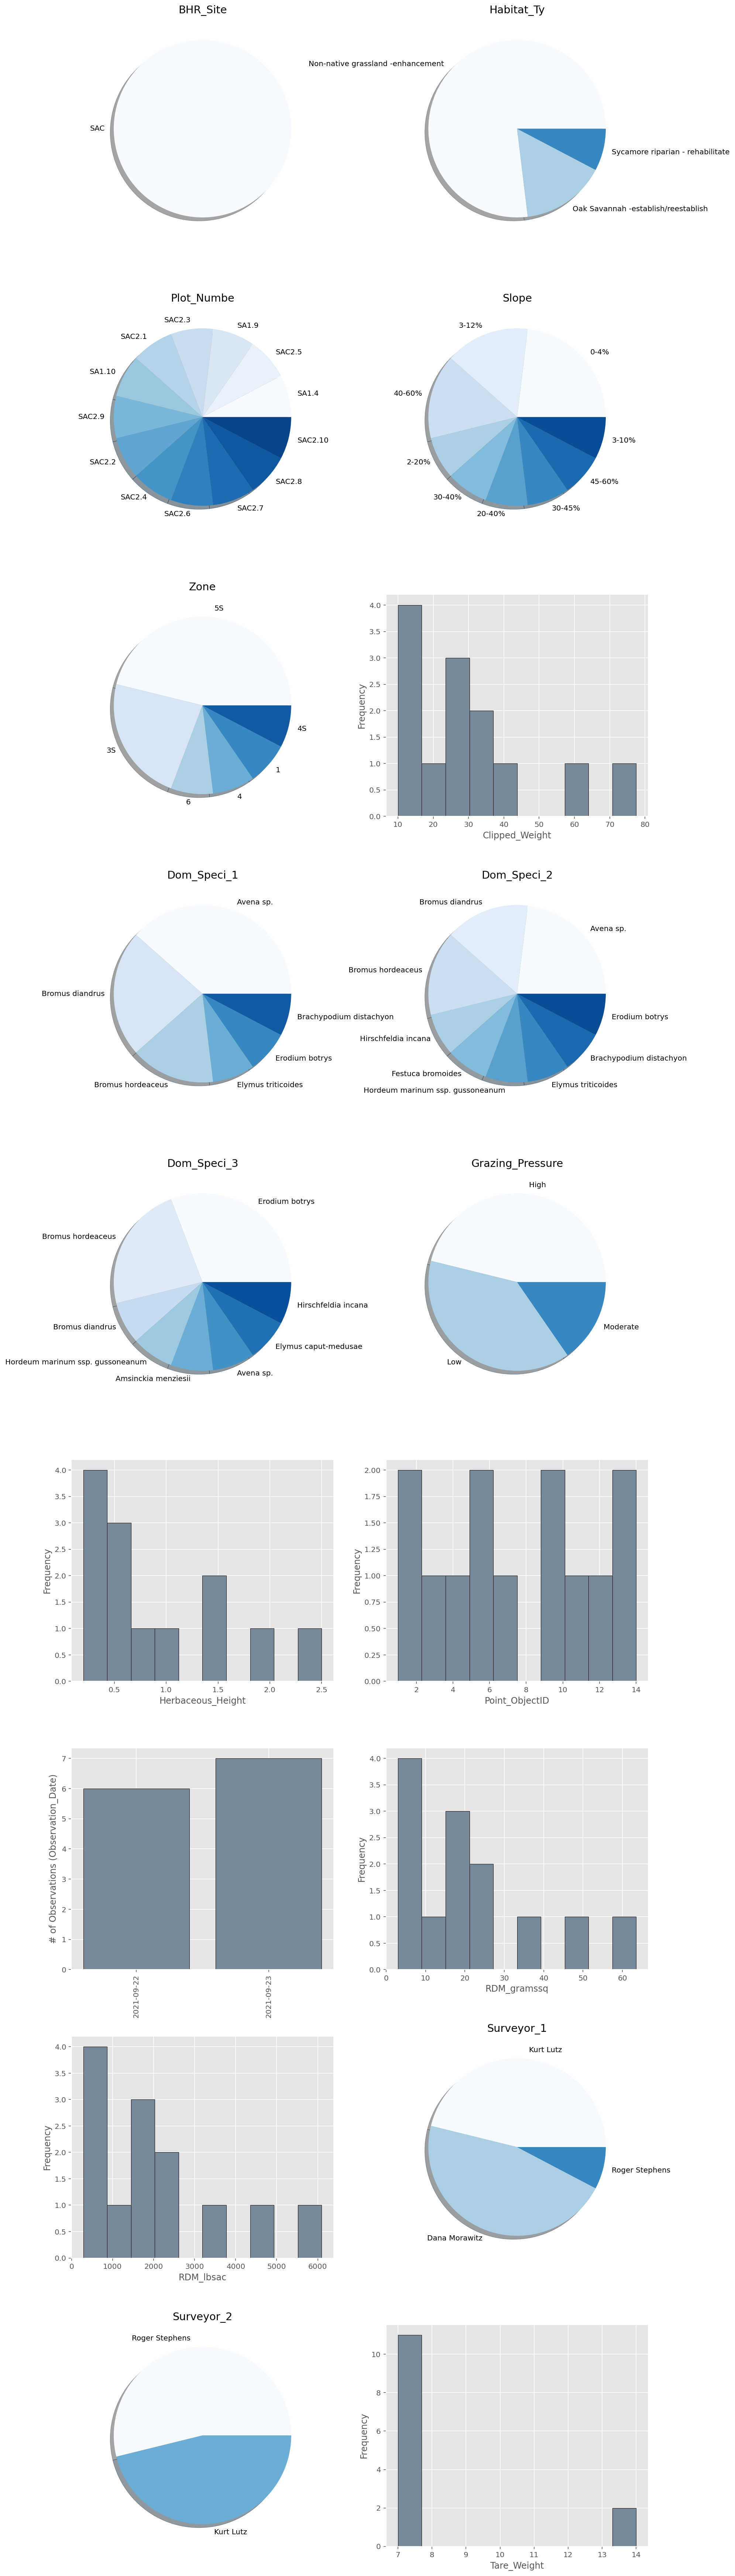

In [9]:
QAQC_plot(sub,['BHR_Site', 'Habitat_Ty', 'Plot_Numbe', 'Slope', 'Zone',
       'Clipped_Weight', 'Dom_Speci_1', 'Dom_Speci_2',
       'Dom_Speci_3', 'Grazing_Pressure', 'Herbaceous_Height',
       'Point_ObjectID', 'Observation_Date', 'RDM_gramssq', 'RDM_lbsac', 'Surveyor_1',
       'Surveyor_2', 'Tare_Weight'])

Herbaceous_Height  Outlier: False
RDM_gramssq  Outlier: True
See Outlier Entries Below:


,Point_ObjectID,Plot_Numbe,Habitat_Ty,Zone,Slope,BHR_Site,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,Dom_Speci_1,Dom_Speci_2,Dom_Speci_3,Comments,Recond_GlobalID,RDM_gramssq,RDM_lbsac,Clipped_Weight,Tare_Weight,Observation_Date,Herbaceous_Height,Grazing_Pressure,Herbaceous_Height_Outlier,RDM_gramssq_Outlier
11,3,SA1.9,Oak Savannah -establish/reestablish,4,0-4%,SAC,"{'x': 6185615.444810554, 'y': 2036868.8071567267, 'spatialReferenc...",40,Dana Morawitz,Kurt Lutz,Bromus diandrus,Avena sp.,Amsinckia menziesii,"Hoop is SE of the point, grazing pressure exists but is very low, ...",c3b040e1-759a-445f-9574-4a18a8339137,63.5,6096,77.5,14.0,2021-09-22 19:17:58,2.0,Low,False,True


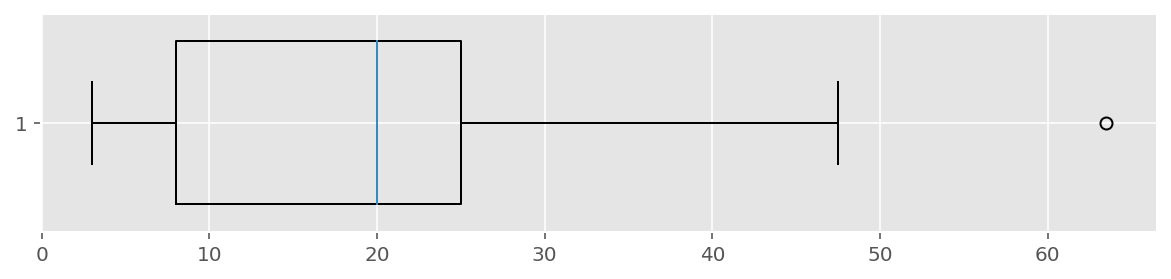

Tare_Weight  Outlier: True
See Outlier Entries Below:


,Point_ObjectID,Plot_Numbe,Habitat_Ty,Zone,Slope,BHR_Site,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,Dom_Speci_1,Dom_Speci_2,Dom_Speci_3,Comments,Recond_GlobalID,RDM_gramssq,RDM_lbsac,Clipped_Weight,Tare_Weight,Observation_Date,Herbaceous_Height,Grazing_Pressure,Herbaceous_Height_Outlier,RDM_gramssq_Outlier,Tare_Weight_Outlier
11,3,SA1.9,Oak Savannah -establish/reestablish,4,0-4%,SAC,"{'x': 6185615.444810554, 'y': 2036868.8071567267, 'spatialReferenc...",40,Dana Morawitz,Kurt Lutz,Bromus diandrus,Avena sp.,Amsinckia menziesii,"Hoop is SE of the point, grazing pressure exists but is very low, ...",c3b040e1-759a-445f-9574-4a18a8339137,63.5,6096,77.5,14.0,2021-09-22 19:17:58,2.0,Low,False,True,True
23,6,SA1.10,Oak Savannah -establish/reestablish,1,0-4%,SAC,"{'x': 6181100.076544717, 'y': 2036931.8805213869, 'spatialReferenc...",49,Dana Morawitz,Kurt Lutz,Bromus diandrus,Avena sp.,Bromus hordeaceus,"Some burrows, clumped soil suggesting gopher mounds too, no grazin...",174bb6b8-e3f9-45f7-aa52-402dde9a902d,47.5,4560,61.5,14.0,2021-09-23 20:33:13,1.5,Low,False,False,True


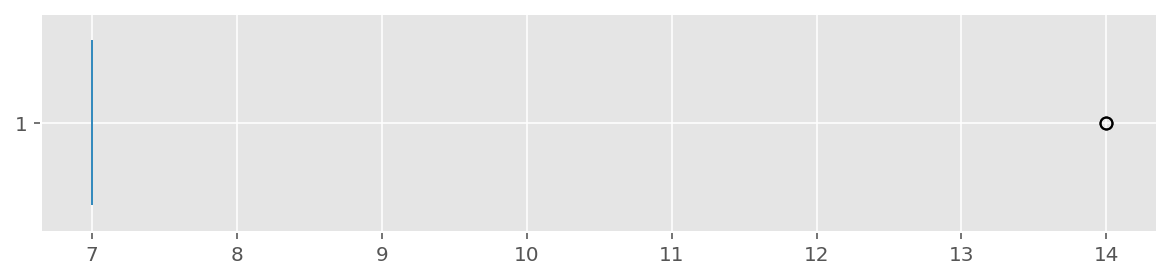

In [10]:
 outlier = find_outlier(sub,['Herbaceous_Height','RDM_gramssq','Tare_Weight'])

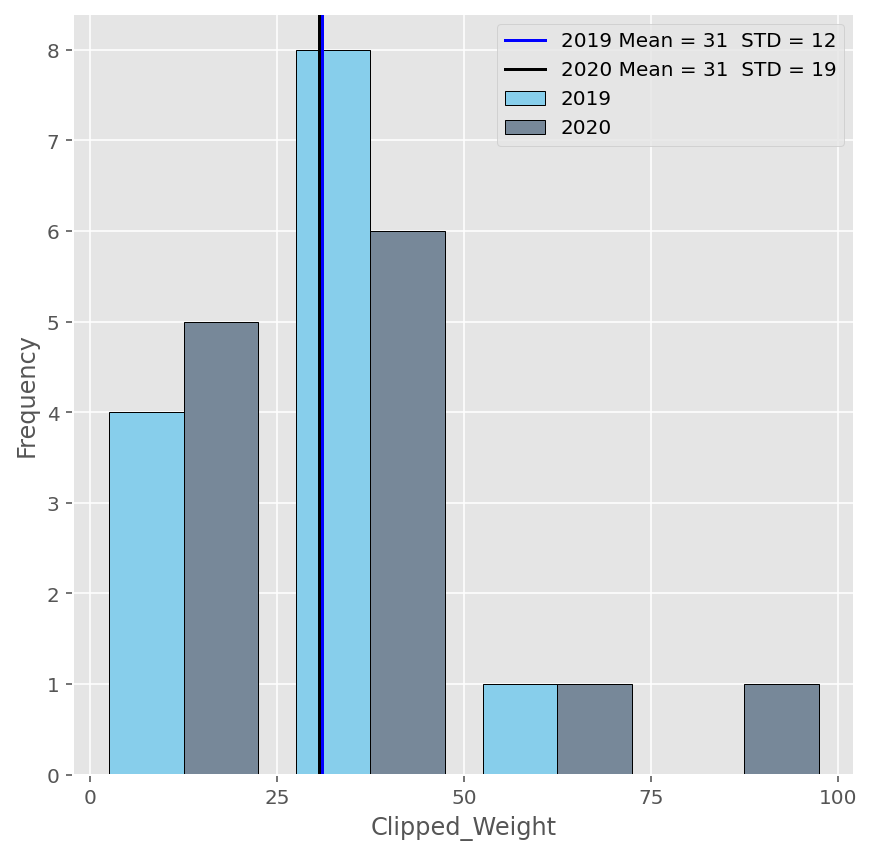

In [11]:
compare_years_continuous(data, 'Clipped_Weight', '2019', '2020', 25)

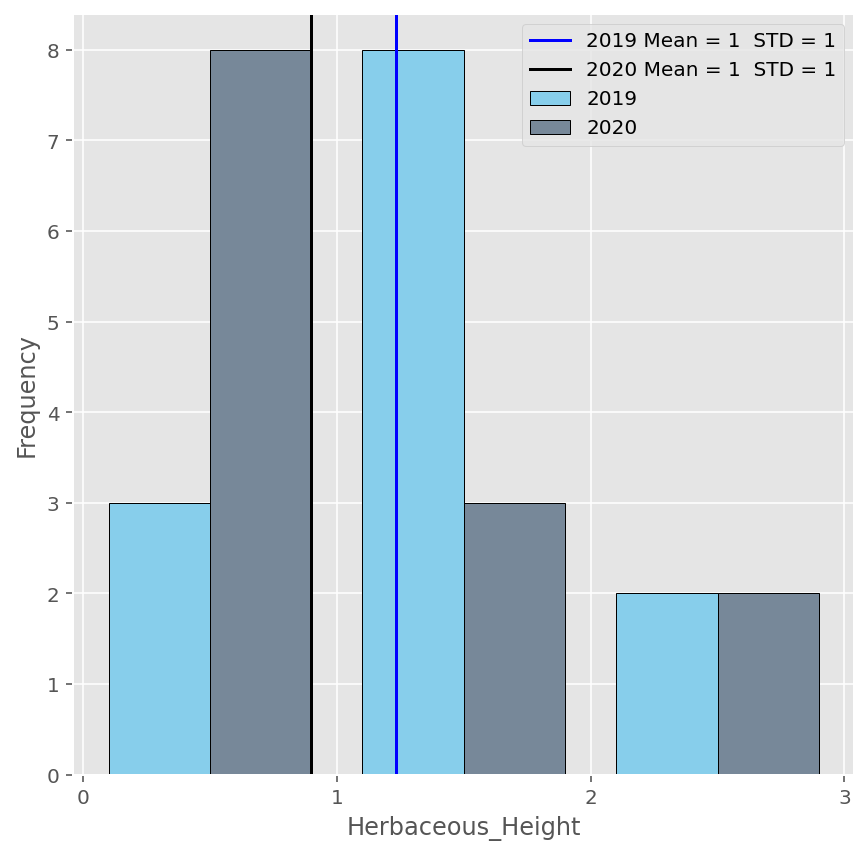

In [12]:
compare_years_continuous(data, 'Herbaceous_Height', '2019', '2020', 1)

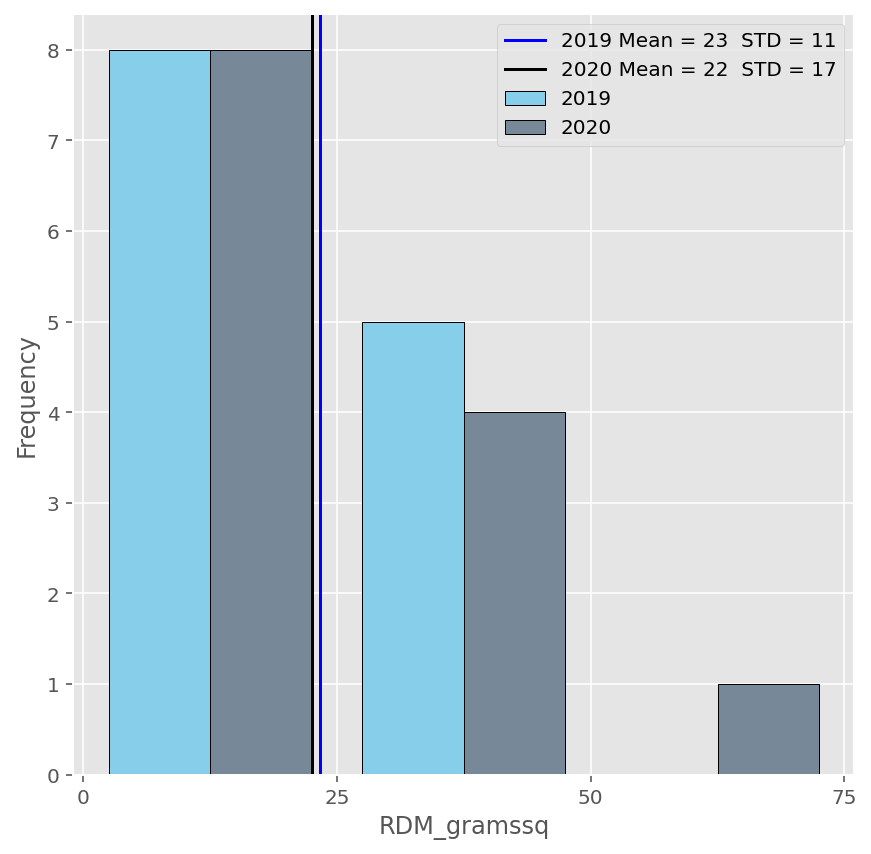

In [13]:
compare_years_continuous(data, 'RDM_gramssq', '2019', '2020', 25)

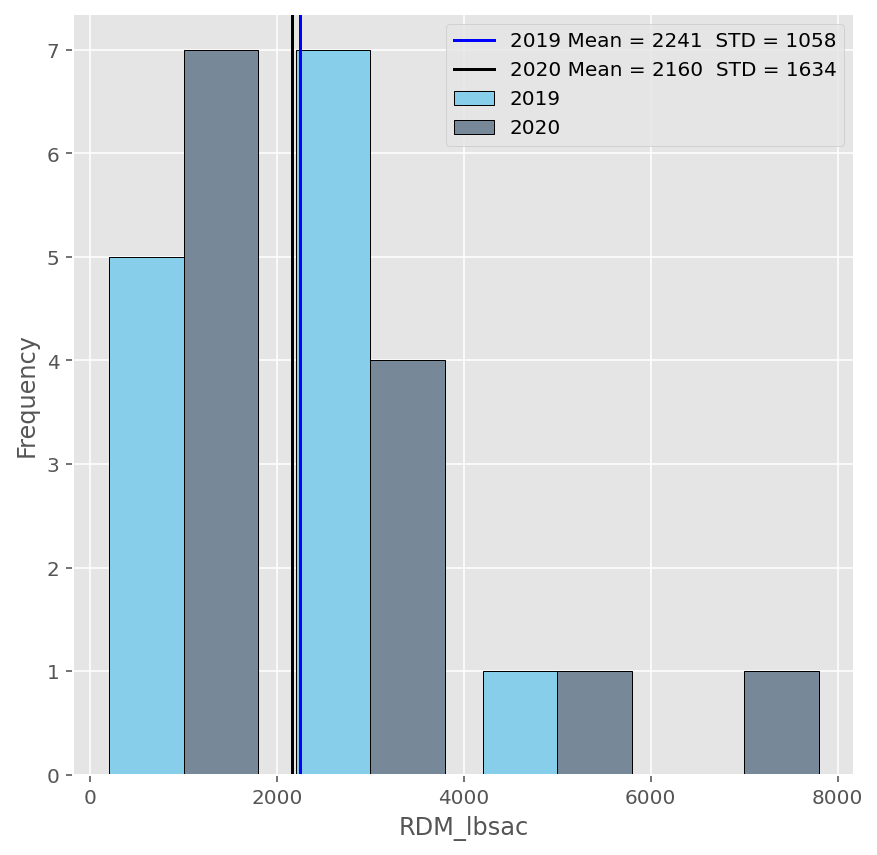

In [14]:
compare_years_continuous(data, 'RDM_lbsac', '2019', '2020', 2000)

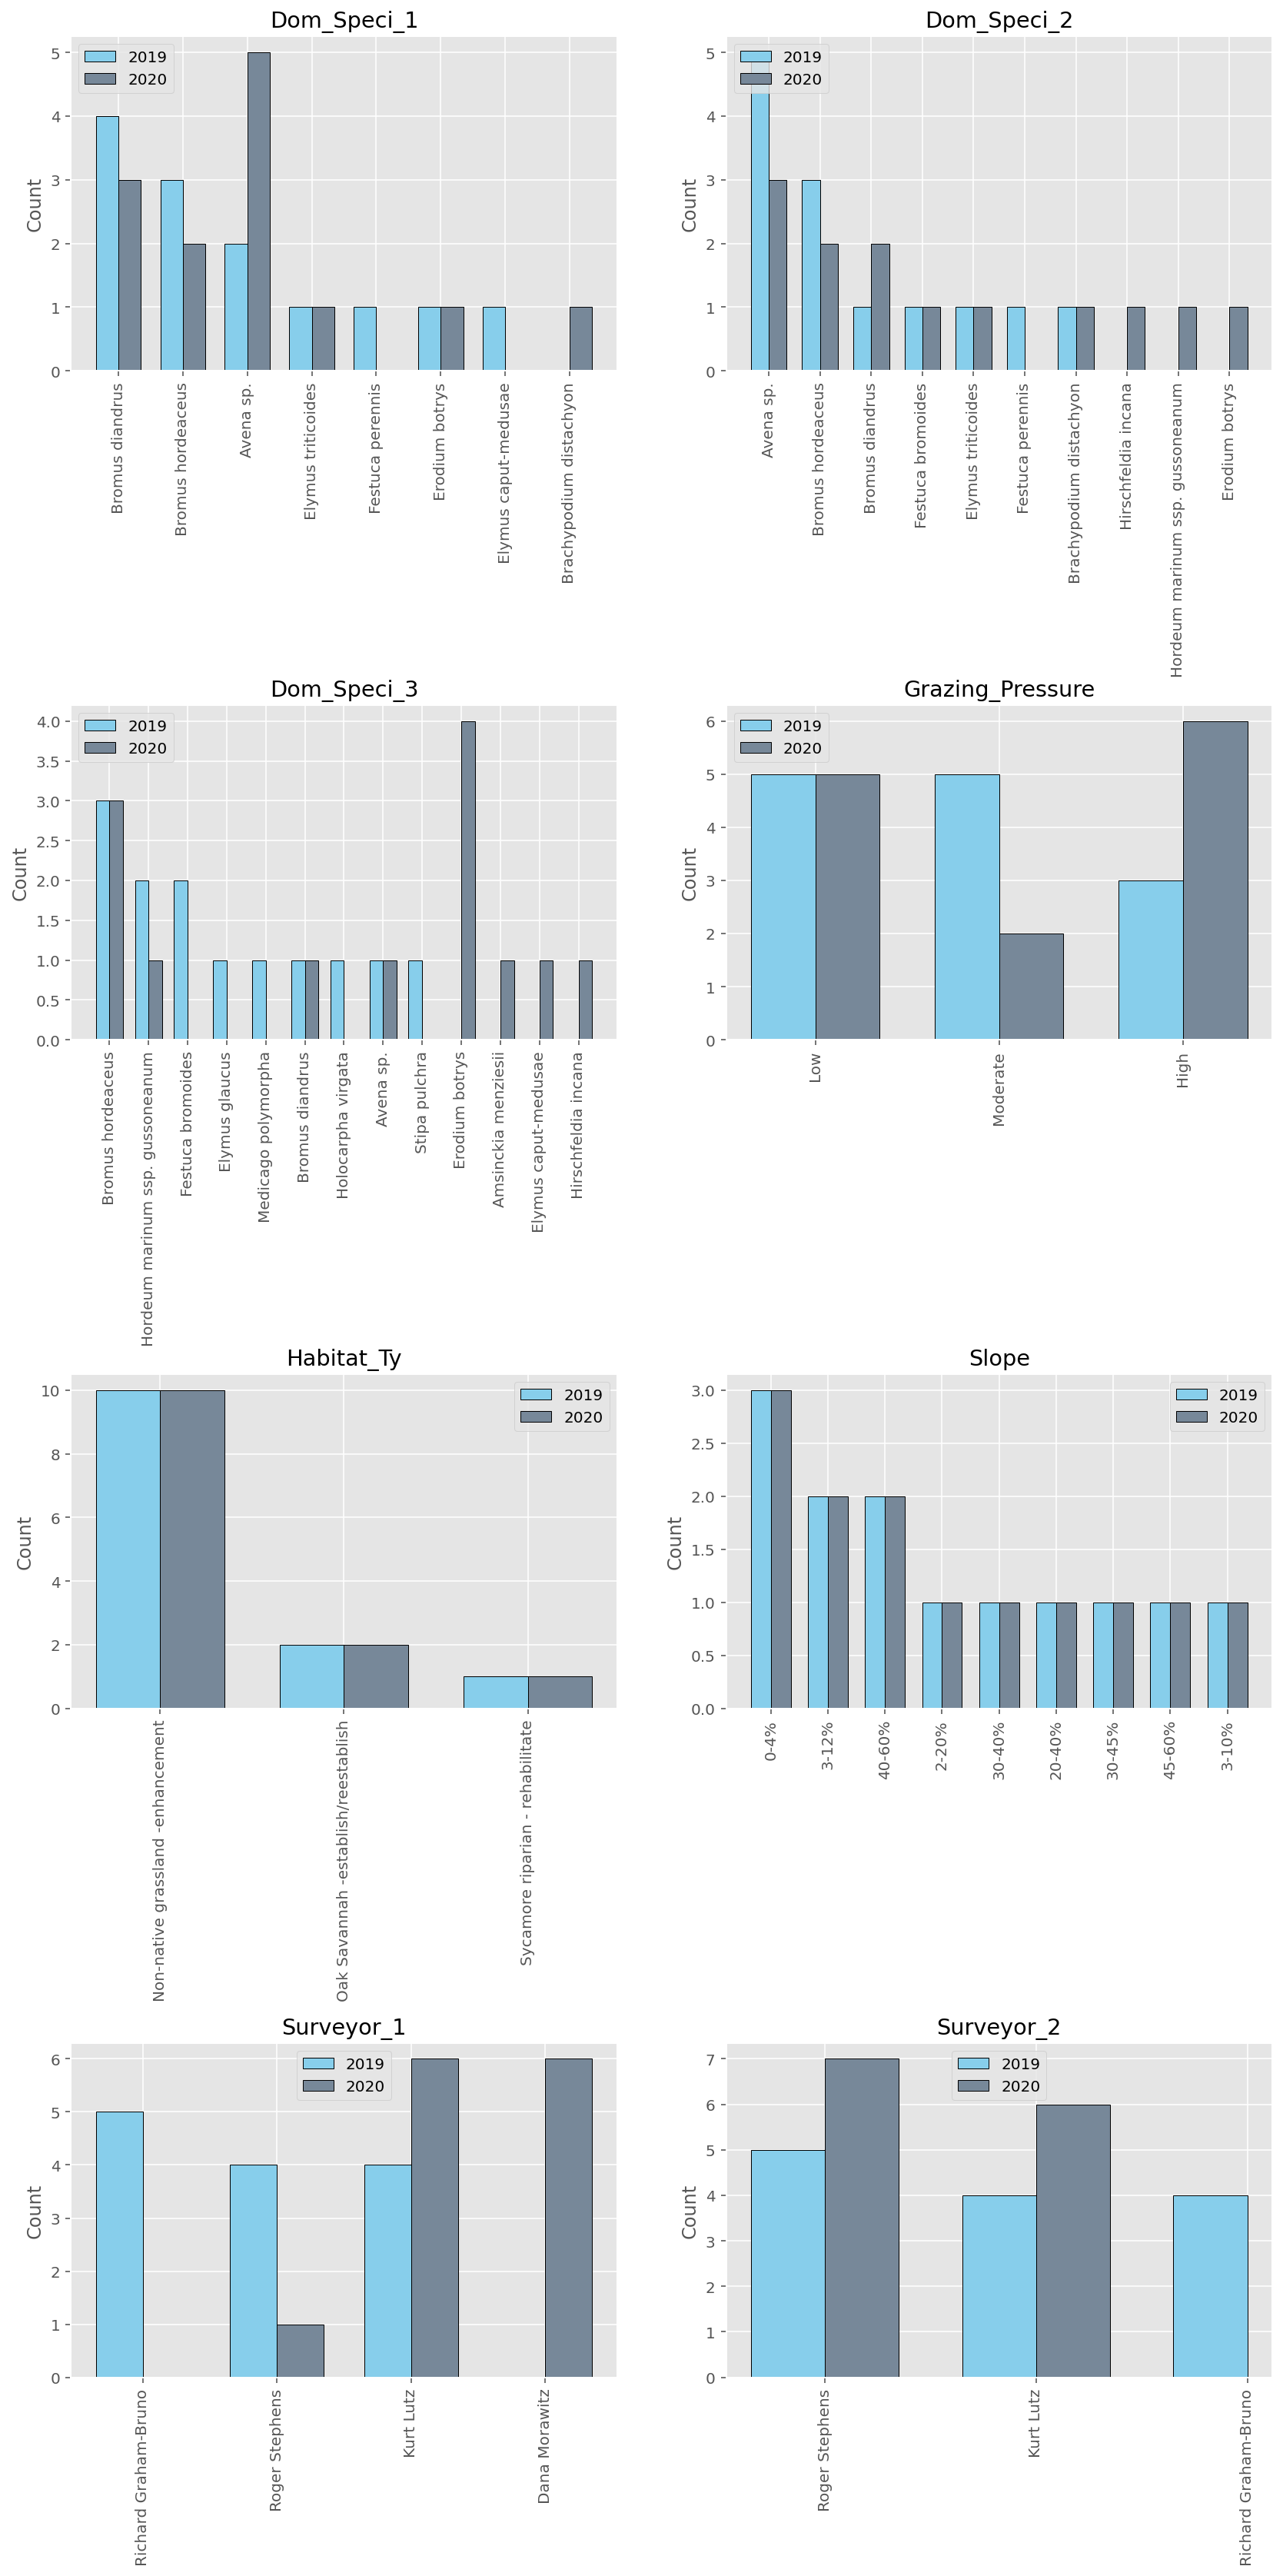

In [15]:
compare_years_catagorical(data, ['Dom_Speci_1','Dom_Speci_2','Dom_Speci_3','Grazing_Pressure','Habitat_Ty','Slope','Surveyor_1',
                                 'Surveyor_2'], '2019','2020')

In [16]:
print('RDM grams/sq ft error:')
((data.Clipped_Weight - data.Tare_Weight) != data.RDM_gramssq).any()

RDM grams/sq ft error:


False

In [17]:
print('RDM grams/sq ft error:')
(data.RDM_gramssq*96 != data.RDM_lbsac).any()

RDM grams/sq ft error:


False

Dropping surveyors with less than 2.6 observations
They did not make over 5% of total observation
Dropping Surveyors: []


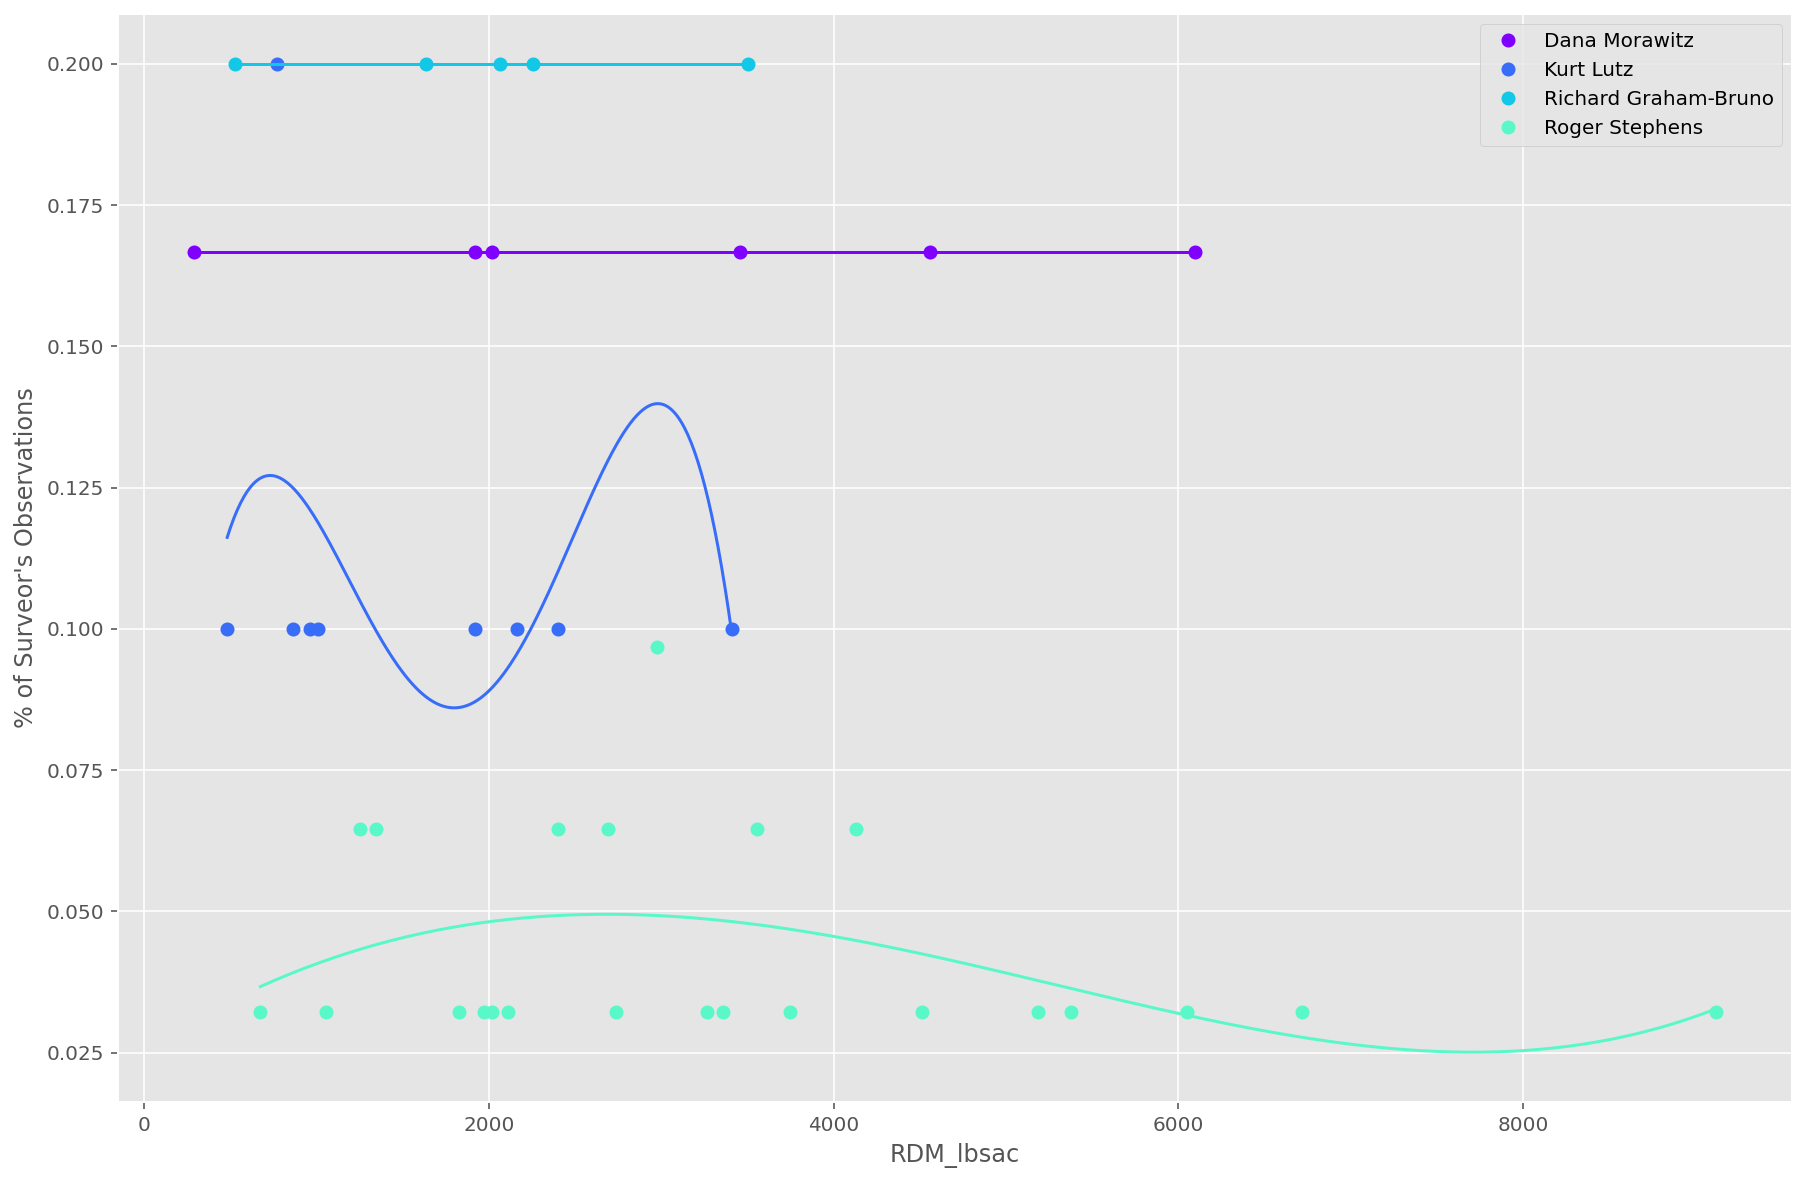

In [18]:
compare_surveyors(data,'RDM_lbsac','Surveyor_1',5)

In [19]:
#photo label check
QAQC_attachment_filenames(feature_service)


No attachments for layer/table Stations



No mislabeled photos found for layer/table Observations


# Results

In [20]:
# Add year column
data['Year'] = data.Observation_Date.dt.year

In [21]:
# Add grazed column
data['Grazed'] = 'Y'
data.loc[data.Plot_Numbe.isin(['SA1.10','SA1.4','SA1.9']),'Grazed'] = 'N'
grazed = data.loc[data.Grazed =='Y',:]

In [22]:
# Sucess criteria, RDM is suppose to be below 1000
data.groupby(['Year','Plot_Numbe']).RDM_lbsac.mean() > 1000

Year  Plot_Numbe
2018  SA1.10         True
      SA1.4          True
      SA1.9          True
      SAC2.1         True
      SAC2.10        True
      SAC2.2         True
      SAC2.3         True
      SAC2.4         True
      SAC2.5         True
      SAC2.6         True
      SAC2.7         True
      SAC2.8         True
      SAC2.9         True
2019  SA1.10         True
      SA1.4          True
      SA1.9          True
      SAC2.1         True
      SAC2.10        True
      SAC2.2        False
      SAC2.3         True
      SAC2.4         True
      SAC2.5         True
      SAC2.6         True
      SAC2.7         True
      SAC2.8         True
      SAC2.9         True
2020  SA1.10         True
      SA1.4          True
      SA1.9          True
      SAC2.1         True
      SAC2.10       False
      SAC2.2        False
      SAC2.3         True
      SAC2.4         True
      SAC2.5         True
      SAC2.6         True
      SAC2.7        False
      SAC2.8         

In [23]:
data = data.set_index('Plot_Numbe')

In [24]:
print('Change in RDM between 2021 and 2020')
data.loc[data.Year==2021,'RDM_lbsac'] - data.loc[data.Year==2020,'RDM_lbsac']

Change in RDM between 2021 and 2020


Plot_Numbe
SA1.4     -1728
SAC2.5     -864
SA1.9      2688
SAC2.3    -1344
SAC2.1     -480
SA1.10     1056
SAC2.9     -144
SAC2.2     -240
SAC2.4      336
SAC2.6     1200
SAC2.7      -96
SAC2.8     -960
SAC2.10    -480
Name: RDM_lbsac, dtype: int64

In [25]:
data.loc[data.Observation_Date == '2019-09-27 23:19:25',:]

,Point_ObjectID,Habitat_Ty,Zone,Slope,BHR_Site,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,Dom_Speci_1,Dom_Speci_2,Dom_Speci_3,Comments,Recond_GlobalID,RDM_gramssq,RDM_lbsac,Clipped_Weight,Tare_Weight,Observation_Date,Herbaceous_Height,Grazing_Pressure,Year,Grazed
Plot_Numbe,,,,,,,,,,,,,,,,,,,,,,,
SAC2.9,7,Non-native grassland -enhancement,5S,30-40%,SAC,"{'x': 6188855.353685051, 'y': 2035684.5539478064, 'spatialReferenc...",20,Roger Stephens,Nicholas Regent,Avena sp.,Bromus hordeaceus,Festuca perennis,"Rebar removed, Carsonite post installed 20190301. Hoop in south. C...",b2cce642-80e7-4bc5-aa3f-176dd255ff3a,56.0,5376,70.0,14.0,2019-09-27 23:19:25,1.5,Moderate,2019,Y


In [26]:
# Sucess criteria, RDM suppose to be above 600
data.groupby(['Year','Plot_Numbe']).RDM_lbsac.mean() < 600

Year  Plot_Numbe
2018  SA1.10        False
      SA1.4         False
      SA1.9         False
      SAC2.1        False
      SAC2.10       False
      SAC2.2        False
      SAC2.3        False
      SAC2.4        False
      SAC2.5        False
      SAC2.6        False
      SAC2.7        False
      SAC2.8        False
      SAC2.9        False
2019  SA1.10        False
      SA1.4         False
      SA1.9         False
      SAC2.1        False
      SAC2.10       False
      SAC2.2        False
      SAC2.3        False
      SAC2.4        False
      SAC2.5        False
      SAC2.6        False
      SAC2.7        False
      SAC2.8        False
      SAC2.9        False
2020  SA1.10        False
      SA1.4         False
      SA1.9         False
      SAC2.1        False
      SAC2.10       False
      SAC2.2         True
      SAC2.3        False
      SAC2.4        False
      SAC2.5        False
      SAC2.6        False
      SAC2.7        False
      SAC2.8        F

In [27]:
mean_rdm = data.groupby(['Year']).RDM_lbsac.mean()
print('Mean RDM (lbs/ac):\n',mean_rdm.round(1).to_string())

Mean RDM (lbs/ac):
 Year
2018    3474.5
2019    3079.4
2020    2241.2
2021    2160.0


In [28]:
print('Standard Deviation RDM (lbs/ac):\n',data.groupby(['Year']).RDM_lbsac.std().round(1).to_string())

Standard Deviation RDM (lbs/ac):
 Year
2018    1287.3
2019    2536.1
2020    1100.9
2021    1700.8


In [29]:
print('Min RDM (lbs/acres):\n',data.groupby('Year').RDM_lbsac.min().to_string())
print('\n\nMax RDM (lbs/acres):\n',data.groupby('Year').RDM_lbsac.max().to_string())

Min RDM (lbs/acres):
 Year
2018    1248
2019     672
2020     528
2021     288


Max RDM (lbs/acres):
 Year
2018    6048
2019    9120
2020    4128
2021    6096


In [30]:
data.groupby(['Year','Grazed']).RDM_lbsac.mean()

Year  Grazed
2018  N         4640.0
      Y         3124.8
2019  N         6464.0
      Y         2064.0
2020  N         3680.0
      Y         1809.6
2021  N         4352.0
      Y         1502.4
Name: RDM_lbsac, dtype: float64

In [31]:
data.groupby(['Year','Grazed']).RDM_lbsac.std()

Year  Grazed
2018  N         1234.387297
      Y         1132.377322
2019  N         2792.813635
      Y         1370.594032
2020  N          390.937335
      Y          827.696563
2021  N         1856.758466
      Y         1004.323454
Name: RDM_lbsac, dtype: float64

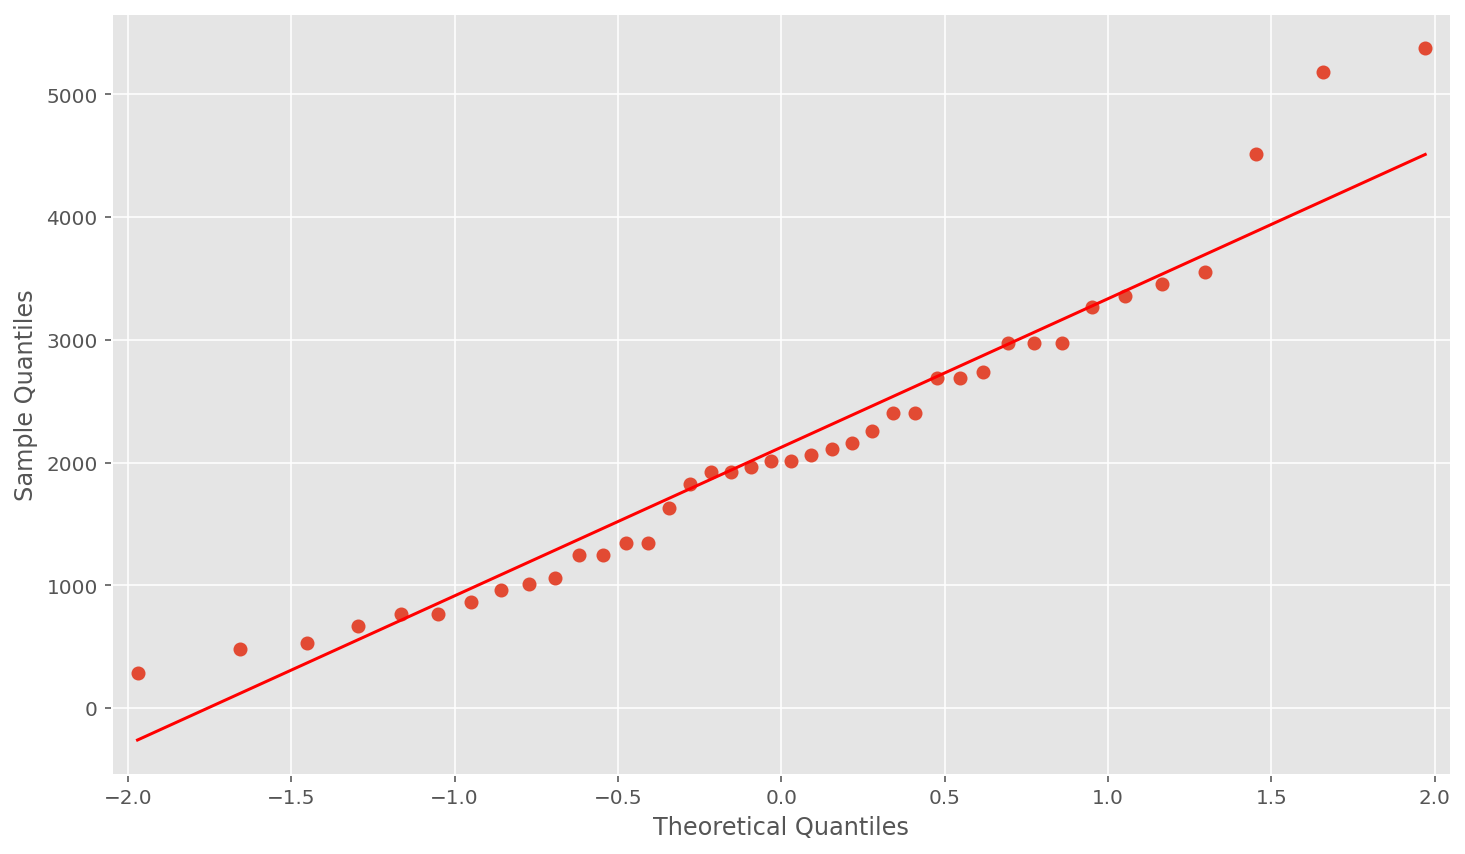

In [32]:
#QQ plots to view if data is normal
# If the blue points lie along the red line the data is normal
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot as plt

# q-q plot
qqplot(grazed.RDM_lbsac, line='s')
plt.show()

In [33]:
#Remove outlier for 2019
grazed_cleaned = grazed.loc[grazed.Observation_Date != '2019-09-27 23:19:25',:]


In [34]:
grazed.loc[grazed.Observation_Date == '2019-09-27 23:19:25',:]

,Point_ObjectID,Plot_Numbe,Habitat_Ty,Zone,Slope,BHR_Site,SHAPE,Record_ObjectID,Surveyor_1,Surveyor_2,Dom_Speci_1,Dom_Speci_2,Dom_Speci_3,Comments,Recond_GlobalID,RDM_gramssq,RDM_lbsac,Clipped_Weight,Tare_Weight,Observation_Date,Herbaceous_Height,Grazing_Pressure,Year,Grazed
25,7,SAC2.9,Non-native grassland -enhancement,5S,30-40%,SAC,"{'x': 6188855.353685051, 'y': 2035684.5539478064, 'spatialReferenc...",20,Roger Stephens,Nicholas Regent,Avena sp.,Bromus hordeaceus,Festuca perennis,"Rebar removed, Carsonite post installed 20190301. Hoop in south. C...",b2cce642-80e7-4bc5-aa3f-176dd255ff3a,56.0,5376,70.0,14.0,2019-09-27 23:19:25,1.5,Moderate,2019,Y


In [35]:
#Test if data is normal
from scipy.stats import shapiro
import scipy
from scipy import stats

# normality test
stat, p = shapiro(grazed_cleaned.RDM_lbsac)
print('All data\nStatistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian - Normal (fail to reject H0)')
else:
    print('Sample does not look Gaussian - Not Normal (reject H0)')

All data
Statistics=0.959, p=0.168
Sample looks Gaussian - Normal (fail to reject H0)


In [36]:
#Test Homogeneity of variance
stats.levene(grazed_cleaned['RDM_lbsac'][grazed_cleaned['Year'] == 2018],
             grazed_cleaned['RDM_lbsac'][grazed_cleaned['Year'] == 2019],
             grazed_cleaned['RDM_lbsac'][grazed_cleaned['Year'] == 2020],
             grazed_cleaned['RDM_lbsac'][grazed_cleaned['Year'] == 2021])
#P > .05
#The Levene's test of homogeneity of variances is not significant which indicates that the groups have non-statistically significant difference in their varability.

LeveneResult(statistic=0.407998717812594, pvalue=0.7482077687561104)

In [37]:
# one-way anova - outlier removed
mod = ols('RDM_lbsac ~ Year', data=grazed_cleaned).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
# P value = 0.005, the groups are different

                sum_sq    df          F    PR(>F)
Year      1.152245e+07   1.0  11.765983  0.001497
Residual  3.623416e+07  37.0        NaN       NaN


In [38]:
# one-way anova - all grazed data
mod = ols('RDM_lbsac ~ Year', data=grazed).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)
# P value = 0.01, the groups are not different.

               sum_sq    df          F    PR(>F)
Year      13115393.28   1.0  10.958362  0.002049
Residual  45479877.12  38.0        NaN       NaN


In [39]:
#Tukey Honestly Significant Difference (HSD)
comp = mc.MultiComparison(grazed_cleaned['RDM_lbsac'], grazed_cleaned['Year'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

#Any comparisons where reject = True means there is a difference between the two years

group1,group2,meandiff,p-adj,lower,upper,reject
2018,2019,-1428.8,0.0121,-2604.4033,-253.1967,True
2018,2020,-1315.2,0.019,-2459.4483,-170.9517,True
2018,2021,-1622.4,0.0028,-2766.6483,-478.1517,True
2019,2020,113.6,0.9,-1062.0033,1289.2033,False
2019,2021,-193.6,0.9,-1369.2033,982.0033,False
2020,2021,-307.2,0.8801,-1451.4483,837.0483,False


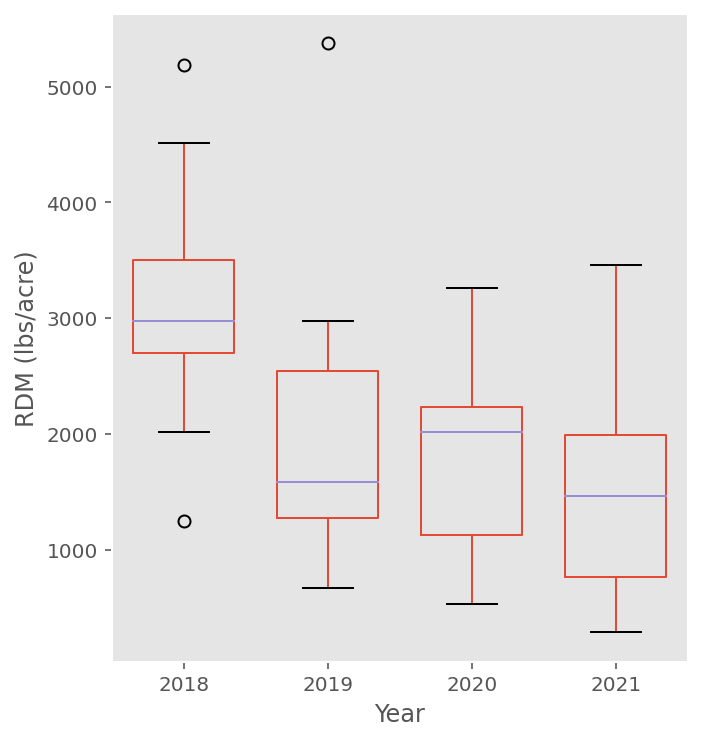

In [40]:
grazed.boxplot('RDM_lbsac', by='Year', grid=False, figsize=(5,6), widths=(.7, .7, .7, .7))
plt.title("")
plt.suptitle("")
plt.ylabel('RDM (lbs/acre)')
ax = plt.gca()

In [41]:
#Tukey Honestly Significant Difference (HSD)
comp = mc.MultiComparison(grazed_cleaned['RDM_lbsac'], grazed_cleaned['Grazing_Pressure'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

#Any comparisons where reject = True means there is a difference between the two years

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,1549.7143,0.0017,544.7314,2554.6972,True
High,Moderate,579.0,0.3302,-401.0964,1559.0964,False
Low,Moderate,-970.7143,0.0242,-1831.5428,-109.8858,True


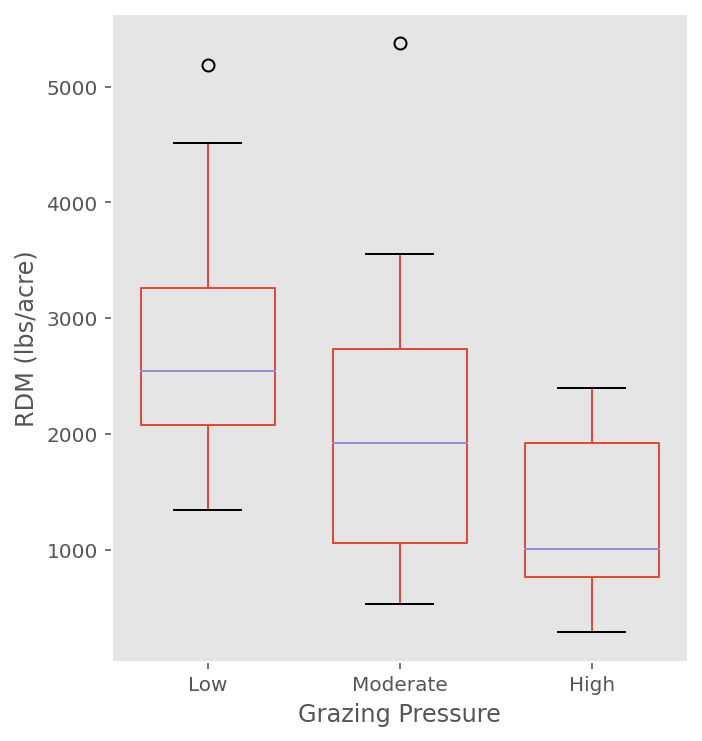

In [42]:
grazed.boxplot('RDM_lbsac', by='Grazing_Pressure', grid=False, figsize=(5,6), widths=(.7, 0.7, .7), positions=[2,0,1])
plt.title("")
plt.suptitle("")
plt.ylabel('RDM (lbs/acre)')
plt.xlabel('Grazing Pressure')
ax = plt.gca()

In [43]:
#Tukey Honestly Significant Difference (HSD)
comp = mc.MultiComparison(grazed_cleaned['Herbaceous_Height'], grazed_cleaned['Year'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

#Any comparisons where reject = True means there is a difference between the two years

group1,group2,meandiff,p-adj,lower,upper,reject
2018,2019,-0.1889,0.8072,-0.7839,0.4061,False
2018,2020,-0.3,0.5086,-0.8791,0.2791,False
2018,2021,-0.735,0.0083,-1.3141,-0.1559,True
2019,2020,-0.1111,0.9,-0.7061,0.4839,False
2019,2021,-0.5461,0.0817,-1.1411,0.0489,False
2020,2021,-0.435,0.1981,-1.0141,0.1441,False


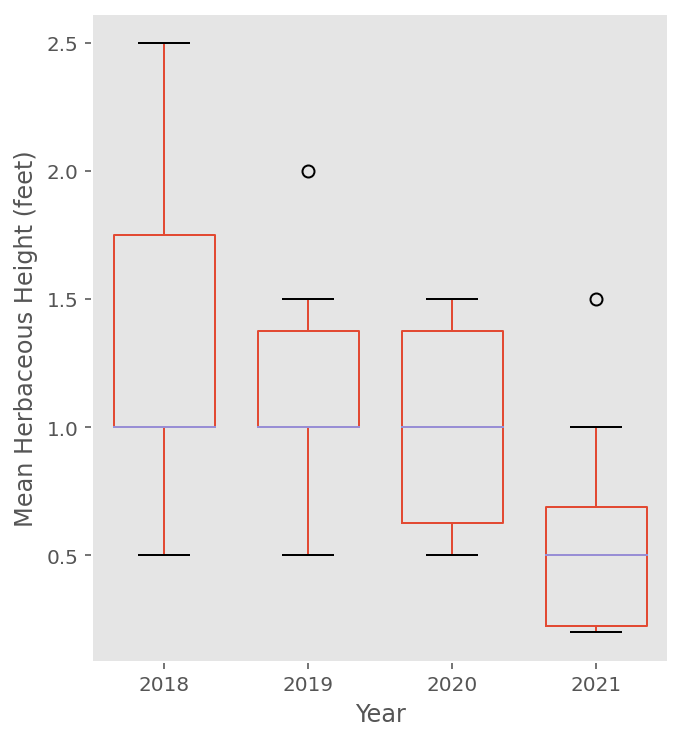

In [44]:
grazed.boxplot('Herbaceous_Height', by='Year', grid=False, figsize=(5,6), widths=(.7, 0.7, .7, .7))
plt.title("")
plt.suptitle("")
plt.ylabel('Mean Herbaceous Height (feet)')
ax = plt.gca()

In [45]:
#Tukey Honestly Significant Difference (HSD)
comp = mc.MultiComparison(grazed_cleaned['Herbaceous_Height'], grazed_cleaned['Grazing_Pressure'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

#Any comparisons where reject = True means there is a difference between the two years

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,0.9595,0.001,0.5373,1.3818,True
High,Moderate,0.5198,0.0106,0.108,0.9316,True
Low,Moderate,-0.4397,0.0142,-0.8014,-0.0781,True


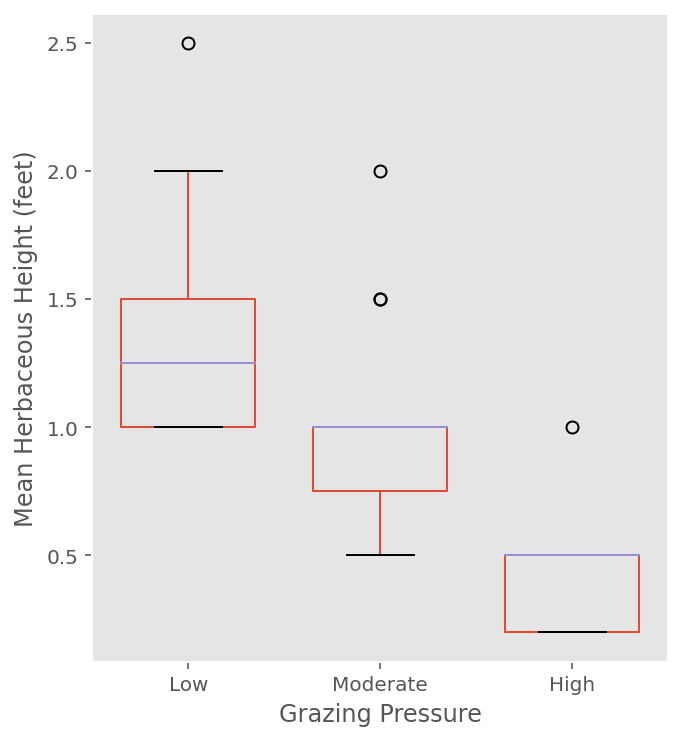

In [46]:
grazed.boxplot('Herbaceous_Height', by='Grazing_Pressure', grid=False, figsize=(5,6), widths=(.7, 0.7, .7), positions=[2,0,1])
plt.title("")
plt.suptitle("")
plt.ylabel('Mean Herbaceous Height (feet)')
plt.xlabel('Grazing Pressure')
ax = plt.gca()

# export excel data deliverable

In [47]:
data.columns

Index(['Point_ObjectID', 'Habitat_Ty', 'Zone', 'Slope', 'BHR_Site', 'SHAPE',
       'Record_ObjectID', 'Surveyor_1', 'Surveyor_2', 'Dom_Speci_1',
       'Dom_Speci_2', 'Dom_Speci_3', 'Comments', 'Recond_GlobalID',
       'RDM_gramssq', 'RDM_lbsac', 'Clipped_Weight', 'Tare_Weight',
       'Observation_Date', 'Herbaceous_Height', 'Grazing_Pressure', 'Year',
       'Grazed'],
      dtype='object')

In [52]:
# Rename colums
data = data.drop(columns=['Grazed','Year'])
data = data.rename(columns={'Record_ObjectID': 'Object ID', 'Recond_GlobalID' : 'Global ID'})

In [53]:
field_order = [
    'BHR_Site',
    'Observation_Date',
    'Surveyor_1',
    'Surveyor_2',
    'Point_ObjectID',
    'Habitat_Ty',
    'Zone',
    'Slope',
    'Tare_Weight',
    'Clipped_Weight',
    'RDM_gramssq',
    'RDM_lbsac',
    'Dom_Speci_1',
    'Dom_Speci_2', 
    'Dom_Speci_3',
    'Grazing_Pressure',
    'Herbaceous_Height',
    'Comments',
    'Object ID',
    'Global ID',
    'SHAPE'
   ]

In [54]:
#check extraneous columns
x = set(data.columns)

y = set(field_order)

print('Columns that the index has that the data deliverable doesnt have')
print(x - y)

print('Columns the data deliverable has that the index doesnt have.')
print(y - x)

Columns that the index has that the data deliverable doesnt have
set()
Columns the data deliverable has that the index doesnt have.
set()


In [55]:
export_data_deliverable(data, feature_service, field_order, file_name='SAC_Residual_Dry_Matter_Monitoring')

Exported to Outputs/SAC_Residual_Dry_Matter_Monitoring_Data_20211108.xlsx
